# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

## Szyfry Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach JC o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

### Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

In [1]:
# Alfabet jawny i szyfrowy 
ALPHABETS = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

ALPHABET_SIZE = len(ALPHABETS) # 26

In [2]:
def caesar_encrypt(plaintext: str, key: int):
    """
    plaintext -- tekst do zaszyfrowania
    key -- przesunięcie permutacji czyli klucz szyfrowania
    """
    normalized = plaintext.lower()
    ciphertext = ""
    for char in normalized:
        # szyfruj jedynie znane znaki, zachowaj spacje
        if char in ALPHABETS:
            ciphertext += ALPHABETS[(ALPHABETS.index(char) + key) % ALPHABET_SIZE]
        else:
            ciphertext += char
    return ciphertext

def caesar_decrypt(ciphertext: str, key: int):
    plaintext = ""
    for char in ciphertext:
        if char in ALPHABETS:
            plaintext += ALPHABETS[(ALPHABETS.index(char) - key) % ALPHABET_SIZE]
        else:
            plaintext += char
    return plaintext

plaintext = "Zorro fly zealotry zipper"
ciphertext = ""
key = 15

print("Tekst jawny: ", plaintext)
ciphertext = caesar_encrypt(plaintext, key)
print("Szyfrogram: ",  ciphertext)

decodedtext = caesar_decrypt(ciphertext, key)
print("Odszyfrowana wiadomość: ",  decodedtext)

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggd uan otpadign oxeetg
Odszyfrowana wiadomość:  zorro fly zealotry zipper


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu.

# Problem
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

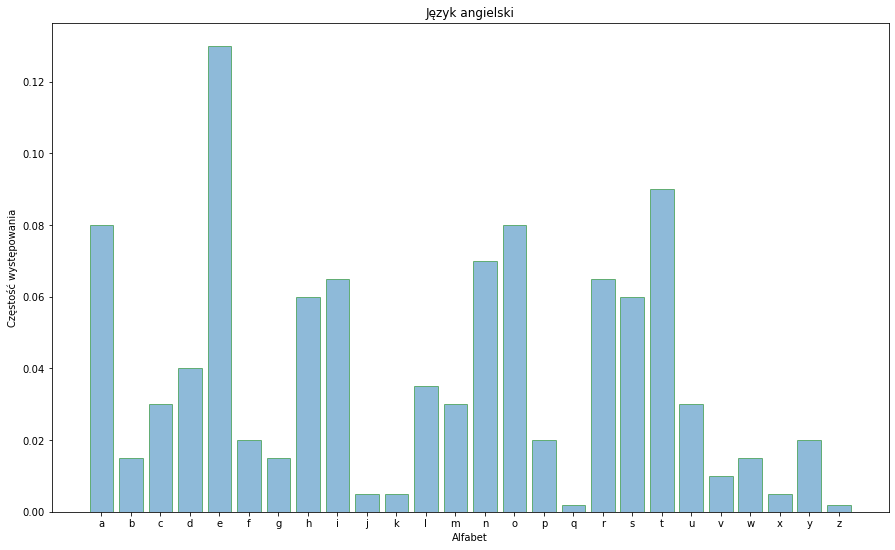

In [3]:
from matplotlib import pyplot as plt
import numpy as np

def plot_frequency(letters, frequency, title, xtitle):
    labels = np.arange(len(letters))
    plt.figure(figsize=(15,9))
    plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
    plt.title(title);
    plt.xlabel(xtitle)
    plt.xticks(np.arange(len(letters)), letters)
    plt.ylabel('Częstość występowania')
    plt.show()
    
frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
plot_frequency(ALPHABETS, frequency, "Język angielski", "Alfabet")

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym kluczem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej.  

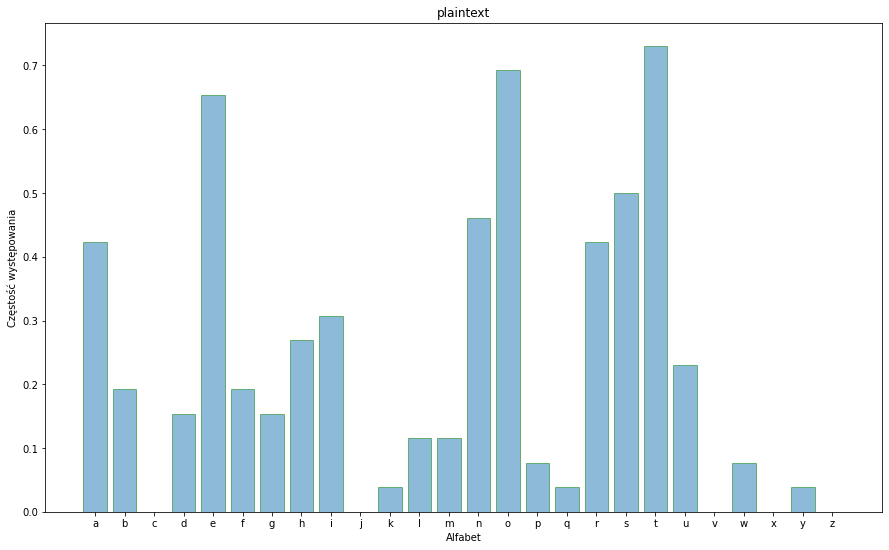

In [4]:
import numpy as np
from matplotlib import pyplot as plt

plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

Alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
]

plaintext = plaintext.lower()

def text_frequency(alphabet, text):
    ALP_SIZE = len(alphabet)
    frequency = [0] * ALP_SIZE
    for letter in text:
        frequency[Alphabet.index(letter)] += 1
    for i, number in enumerate(frequency):
        frequency[i] = number / ALP_SIZE
    return frequency

freq = text_frequency(Alphabet, plaintext)

plot_frequency(Alphabet, freq, "plaintext", "Alfabet") 

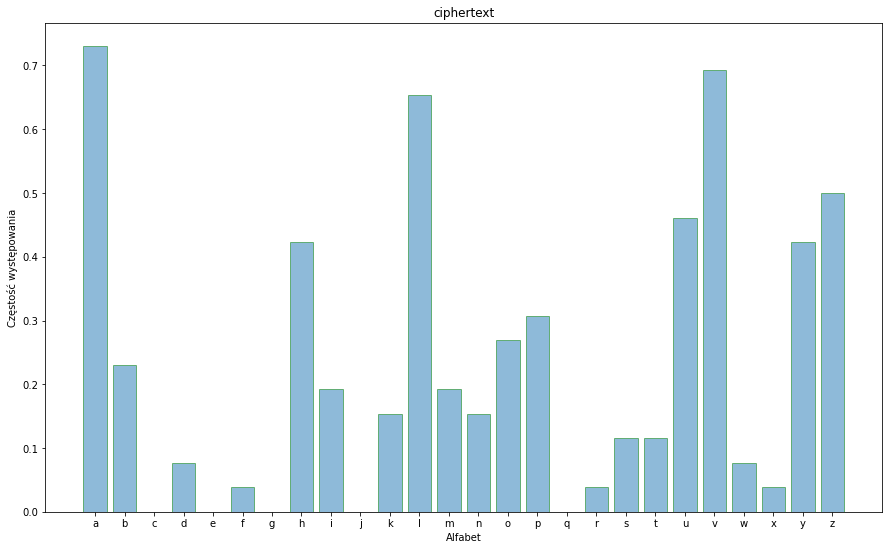

In [5]:
ciphertext = caesar_encrypt(plaintext, 7)

freq_cipher = text_frequency(Alphabet, ciphertext)
plot_frequency(Alphabet, freq_cipher, "ciphertext", "Alfabet") 

#### Przykład zautomatyzowanej kryptoanalizy języka tekstowego. 

In [6]:
import nltk
nltk.download('words')
from nltk.corpus import words

ENGLISH_WORDS = words.words()
ENGLISH_FREQUENCY_PROB = {'a': 0.08, 'b': 0.015, 'c': 0.03, 'd': 0.04, 'e': 0.13, 'f': 0.02,
                          'g': 0.015, 'h': 0.06, 'i': 0.065, 'j': 0.005, 'k': 0.005, 'l': 0.035,
                          'm': 0.03, 'n': 0.07, 'o': 0.08, 'p': 0.02, 'q': 0.002, 'r': 0.065,
                          's': 0.06, 't': 0.09, 'u': 0.03, 'v': 0.01, 'w': 0.015, 'x': 0.005,
                          'y': 0.02, 'z': 0.002}


def crack(ciphertext: str):
    only_alphabets = [char for char in ciphertext if char in ALPHABETS] # tylko znane litery
    unique = list(set(only_alphabets)) # lista liter w szyfrogramie

    # częstość liter w tekście 
    ciphertext_prob = {c: ciphertext.count(c) / float(len(only_alphabets)) for c in unique}

    psi = {k: 0.0 for k in range(0, 26)} # mapowanie z potencjalnego klucza na jego stopień dopasowania
    for key_attempt in range(0, 26): #oblicz dopasowanie
        for unique_char in unique:
            maybe_decoded_letter = caesar_decrypt(unique_char, key_attempt)
            psi[key_attempt] += ciphertext_prob[unique_char] * ENGLISH_FREQUENCY_PROB[maybe_decoded_letter]

    # sortuj od najlepszego dopasowania
    sorted_psi = sorted(psi.items(), key=lambda key_match: key_match[1], reverse=True)

    for key, _ in sorted_psi:
        decoded_string = caesar_decrypt(ciphertext, key)

        print("Próba klucza: ", key, " ....", decoded_string)

        decoded_words = decoded_string.split()
        # czy szyfrowanie ma sens
        if any(decoded_word in ENGLISH_WORDS for decoded_word in decoded_words):
            print("\n", "Odszyfrowany tekst: ", decoded_string)
            return decoded_string
    else:
        print("\n", "Żaden klucz nie przyniósł znanego słowa")
        return None

ciphertext = "oxeetg uaxvwi" # zakomentuj tę linię bo używać szyfrogramu z poprzedniego zadania

print("Szyfrogram:", ciphertext)
crack(ciphertext)

Szyfrogram: oxeetg uaxvwi
Próba klucza:  4  .... ktaapc qwtrse
Próba klucza:  0  .... oxeetg uaxvwi
Próba klucza:  19  .... vellan bhecdp
Próba klucza:  15  .... zipper flight

 Odszyfrowany tekst:  zipper flight


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Mateusz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


'zipper flight'

## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter. 

# Problem
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_


In [7]:
del ciphertext, plaintext
def changing_alphabet(plaintext: str, key: str): # w razie potrzeby dodaj inne argumenty 
    plaintext = plaintext.lower()
    key_index = 0

    ciphertext = ""
    for letter in plaintext:
        letter_code = ord(letter)
        
        shift = ord(key[key_index])-ord('a') + 1
        char_value = letter_code + shift
        if(char_value > 122):
            char_value -= len(Alphabet)
        insert = chr(char_value)
        ciphertext += insert
        key_index = (key_index + 1) % len(key)

    return ciphertext
    

plaintext = "kryptografia"
key = "klucz"

changing_alphabet(plaintext, key)

'vdtstzsmdftm'

### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogrami. 
2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.
3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy? 
4. Jaki klucz gwarantowałby bezpieczeństwo?
5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi? 

### Szyfr polialfabetyczny 
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania? 